In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df.shape

(8124, 23)

In [4]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [5]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

<AxesSubplot:>

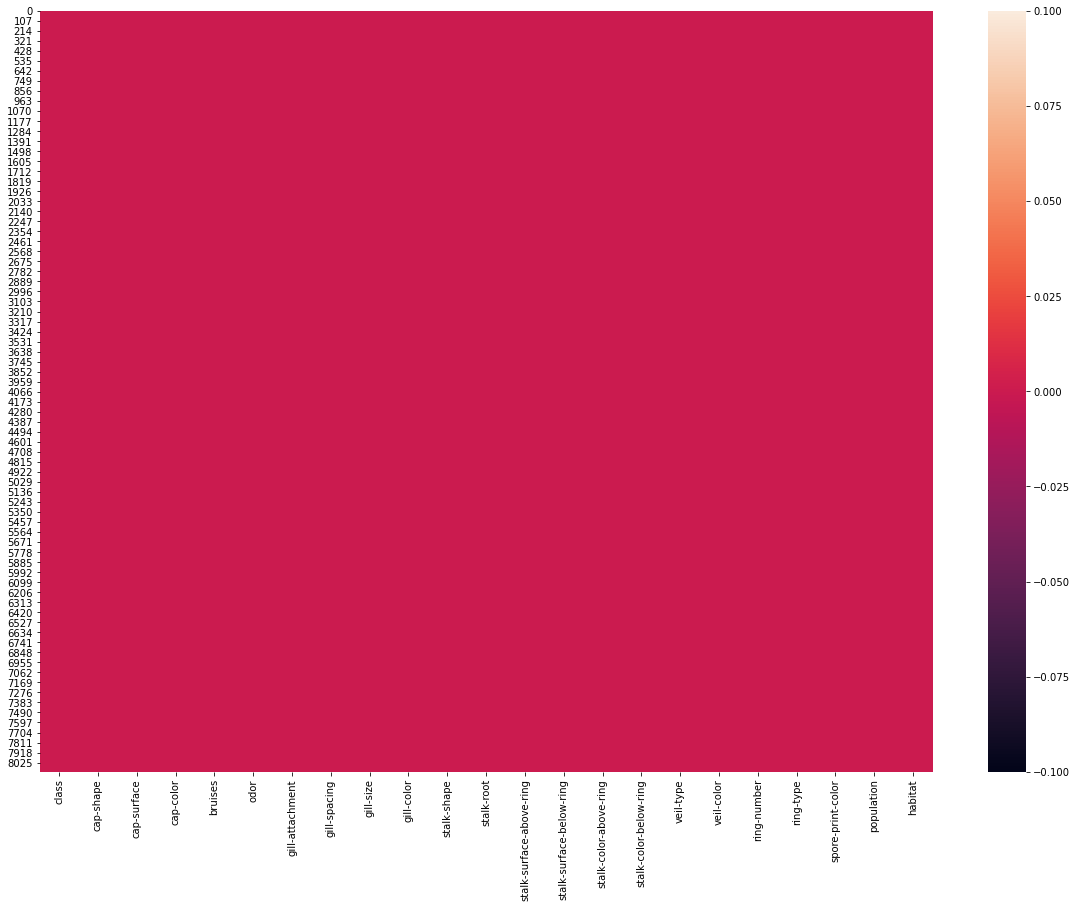

In [7]:
plt.figure(figsize = (20,14))
sns.heatmap(df.isnull())

In [8]:
x = df.drop(["class"],axis=1)
y = df["class"]

In [9]:
x_new = pd.get_dummies(x,drop_first=True)
x_new.head()

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [10]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
y_new = l.fit_transform(y)
y_new

array([1, 0, 0, ..., 0, 1, 0])

In [11]:
x_new.corr()

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
cap-shape_c,1.000000,-0.017672,-0.007477,-0.001396,-0.020077,0.249631,-0.015038,0.015893,-0.001638,-0.010562,...,-0.005051,-0.009456,-0.022075,-0.011469,-0.013306,0.065707,-0.004286,-0.008985,-0.004835,-0.003453
cap-shape_f,-0.017672,1.000000,-0.268226,-0.050070,-0.720235,-0.006285,-0.093397,0.029076,-0.003687,0.009128,...,-0.181191,-0.075804,0.034625,0.111346,-0.017982,-0.052326,-0.129312,0.021891,0.030636,-0.017450
cap-shape_k,-0.007477,-0.268226,1.000000,-0.021185,-0.304733,0.010863,0.137988,0.015261,0.041662,0.162657,...,0.013599,-0.089360,0.172707,-0.170081,-0.113404,0.235108,-0.065047,0.090538,-0.073380,0.119003
cap-shape_s,-0.001396,-0.050070,-0.021185,1.000000,-0.056884,-0.001396,-0.042607,-0.051272,-0.004641,-0.029925,...,-0.014311,-0.026791,0.000341,0.044603,-0.037702,-0.021242,-0.012142,-0.025458,0.288697,-0.009784
cap-shape_x,-0.020077,-0.720235,-0.304733,-0.056884,1.000000,-0.020077,-0.040634,-0.019137,-0.012814,-0.050400,...,-0.004586,0.059264,-0.060421,0.044626,0.023197,-0.096639,-0.004529,-0.029042,0.002845,-0.036493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
habitat_l,0.065707,-0.052326,0.235108,-0.021242,-0.096639,0.065707,0.190799,-0.006819,0.107833,0.140610,...,-0.076868,-0.143906,0.248675,-0.174539,-0.202512,1.000000,-0.065222,-0.136749,-0.073577,-0.052553
habitat_m,-0.004286,-0.129312,-0.065047,-0.012142,-0.004529,-0.004286,0.077081,0.039697,-0.014249,-0.091884,...,0.347262,0.152473,-0.144434,-0.099772,-0.115762,-0.065222,1.000000,-0.078170,-0.042059,-0.030041
habitat_p,-0.008985,0.021891,0.090538,-0.025458,-0.029042,-0.008985,-0.039574,0.117915,0.008698,0.070022,...,-0.092129,-0.125366,0.169228,0.040714,-0.242715,-0.136749,-0.078170,1.000000,-0.088184,-0.062986
habitat_u,-0.004835,0.030636,-0.073380,0.288697,0.002845,-0.004835,0.117548,-0.100248,-0.016074,-0.103655,...,-0.049569,0.130450,0.001180,-0.042888,-0.130592,-0.073577,-0.042059,-0.088184,1.000000,-0.033889


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,random_state=42,test_size=0.20)

In [14]:
x_train.shape

(6499, 95)

In [15]:
x_test.shape

(1625, 95)

In [16]:
y_train.shape

(6499,)

In [17]:
y_test.shape

(1625,)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

model = [LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predictedm=m.predict(x_test)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(y_test,predictedm)*100)
    print(confusion_matrix(y_test,predictedm))
    print(classification_report(y_test,predictedm))
    print('\n')

Accuracy score of LogisticRegression() is:
100.0
[[843   0]
 [  0 782]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



Accuracy score of GaussianNB() is:
94.0923076923077
[[747  96]
 [  0 782]]
              precision    recall  f1-score   support

           0       1.00      0.89      0.94       843
           1       0.89      1.00      0.94       782

    accuracy                           0.94      1625
   macro avg       0.95      0.94      0.94      1625
weighted avg       0.95      0.94      0.94      1625



Accuracy score of SVC() is:
100.0
[[843   0]
 [  0 782]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      